In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('50_Startups.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [7]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [9]:
df1 = pd.get_dummies(df)
df1.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


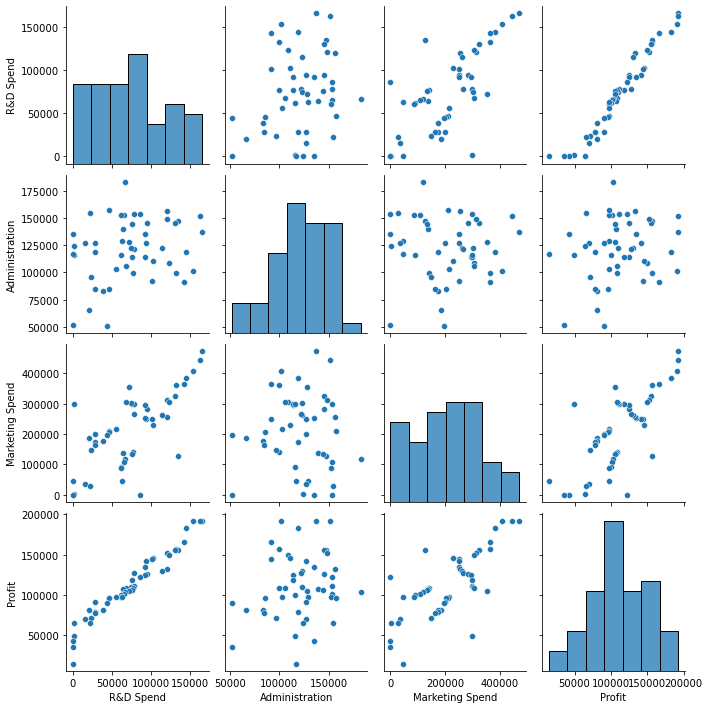

In [10]:
sns.pairplot(df)

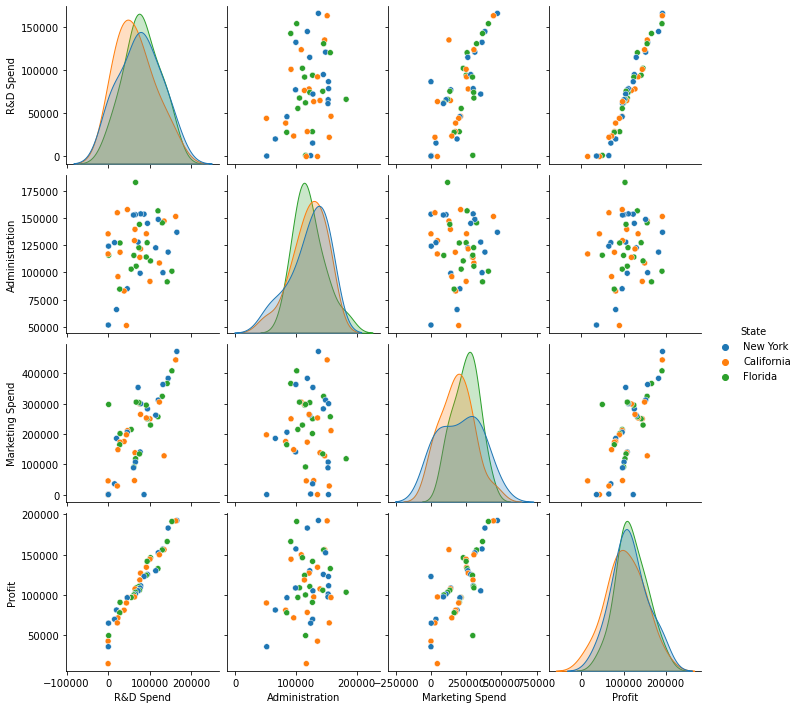

In [11]:
sns.pairplot(df,hue='State')

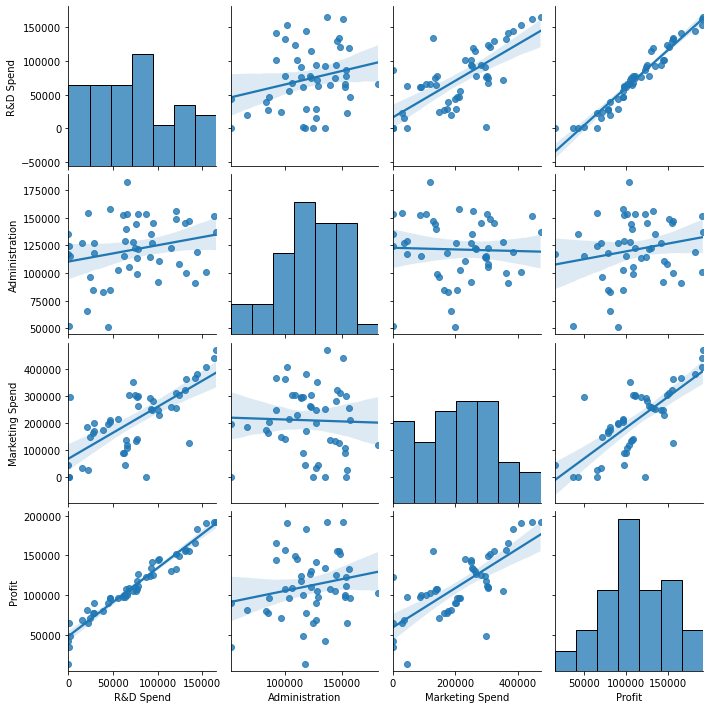

In [12]:
sns.pairplot(df, kind='reg')

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
x = df1.drop('Profit',axis=1)
y = df1['Profit']

In [15]:
model_linear = LinearRegression().fit(x,y)

In [17]:
round(model_linear.score(x,y)*100,2)

95.08

In [18]:
ypred = model_linear.predict(x)

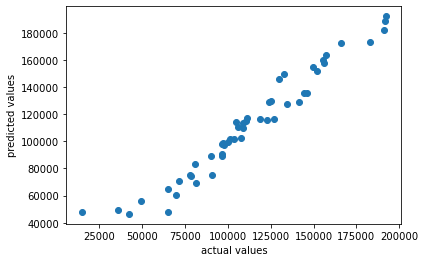

In [21]:
plt.scatter(y,ypred)
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
x_poly2 = PolynomialFeatures().fit_transform(x)
x_poly3 = PolynomialFeatures(degree=3).fit_transform(x)
x_poly4 = PolynomialFeatures(degree=4).fit_transform(x)

In [35]:
x.shape

(50, 6)

In [36]:
x_poly2.shape

(50, 28)

In [37]:
x_poly3.shape

(50, 84)

In [38]:
model_poly2 = LinearRegression().fit(x_poly2,y)
model_poly3 = LinearRegression().fit(x_poly3,y)
model_poly4 = LinearRegression().fit(x_poly4,y)

In [39]:
model_poly2.score(x_poly2,y)

0.9644503223242386

In [40]:
model_poly3.score(x_poly3,y)

0.9880887895569629

In [41]:
model_poly4.score(x_poly4,y)

0.9999997241482365

In [22]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [45]:
model_svr = SVR(kernel='linear').fit(x,y)
model_dtr = DecisionTreeRegressor().fit(x,y)
model_rfr = RandomForestRegressor().fit(x,y)
model_knr = KNeighborsRegressor().fit(x,y)

In [46]:
print('Simple Linear:', round(model_linear.score(x,y)*100,2))
print('SVR:          ', round(model_svr.score(x,y)*100,2))
print('DTR:          ', round(model_dtr.score(x,y)*100,2))
print('RFR:          ', round(model_rfr.score(x,y)*100,2))
print('KNR:          ', round(model_knr.score(x,y)*100,2))
print('Polynomial:   ', round(model_poly4.score(x_poly4,y)*100,2))

Simple Linear: 95.08
SVR:           94.14
DTR:           100.0
RFR:           99.1
KNR:           86.78
Polynomial:    100.0


In [47]:
ypred_linear = model_linear.predict(x)
ypred_svr = model_svr.predict(x)
ypred_dtr = model_dtr.predict(x)
ypred_rfr = model_rfr.predict(x)
ypred_knr = model_knr.predict(x)
ypred_poly4 = model_poly4.predict(x_poly4)

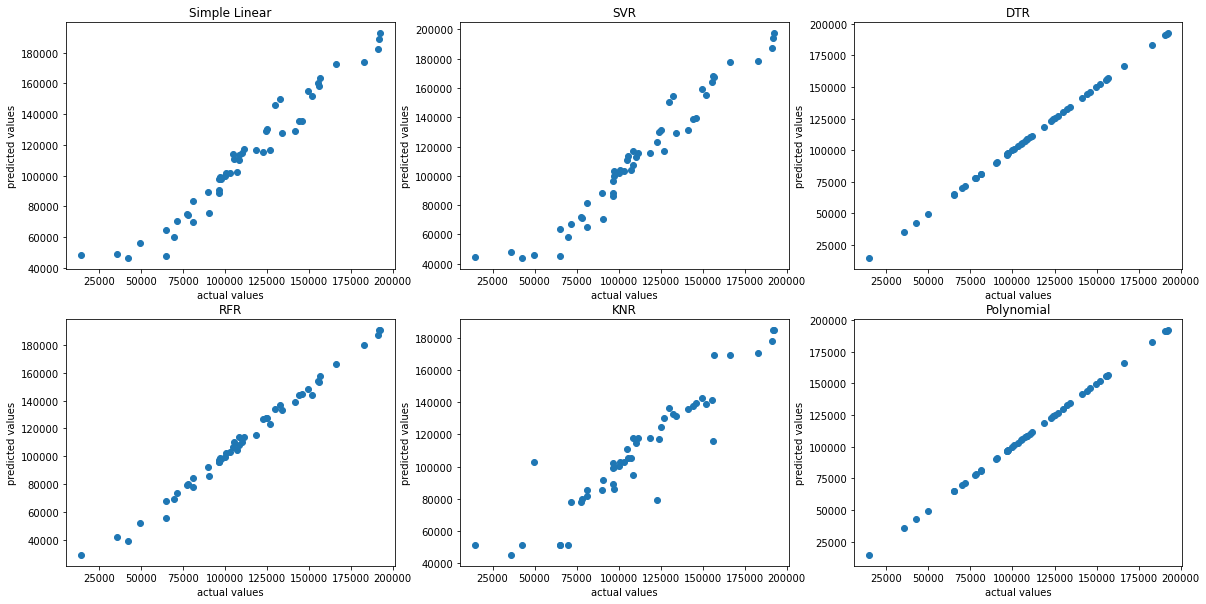

In [48]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.scatter(y,ypred_linear)
plt.title('Simple Linear')
plt.xlabel('actual values')
plt.ylabel('predicted values')

plt.subplot(2,3,2)
plt.scatter(y,ypred_svr)
plt.title('SVR')
plt.xlabel('actual values')
plt.ylabel('predicted values')

plt.subplot(2,3,3)
plt.scatter(y,ypred_dtr)
plt.title('DTR')
plt.xlabel('actual values')
plt.ylabel('predicted values')

plt.subplot(2,3,4)
plt.scatter(y,ypred_rfr)
plt.title('RFR')
plt.xlabel('actual values')
plt.ylabel('predicted values')

plt.subplot(2,3,5)
plt.scatter(y,ypred_knr)
plt.title('KNR')
plt.xlabel('actual values')
plt.ylabel('predicted values')

plt.subplot(2,3,6)
plt.scatter(y,ypred_poly4)
plt.title('Polynomial')
plt.xlabel('actual values')
plt.ylabel('predicted values')

plt.show()

In [67]:
from sklearn.pipeline import Pipeline
model_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=4)),
    ('linear', LinearRegression())
]).fit(x,y)

In [49]:
import pickle

In [50]:
pd.to_pickle(model_poly4,'poly_model.pkl')

In [57]:
f =  open('poly4_model.pkl', 'ab')
pickle.dump(model_poly4, f)

In [58]:
m = pd.read_pickle('poly_model.pkl')

In [59]:
rnd = eval(input('Enter R&D Expenses:'))
admin = eval(input('Enter admin Expenses:'))
marketing = eval(input('Enter Marketing Expenses:'))
state = (input('Enter State:'))
states = [0,0,0]
if state == 'cal':
    states[0] = 1
elif state == 'florida':
    states[1] = 1
elif state == 'ny':
    states[2] = 1
qdf = pd.DataFrame({'R&D':[rnd], 'Admin':[admin], 'Marketing':[marketing], 'State_0':[states[0]], 'State_1':[states[1]],'State_2':[states[2]]})

Enter R&D Expenses: 50000
Enter admin Expenses: 100000
Enter Marketing Expenses: 120000
Enter State: ny


In [63]:
q_x = PolynomialFeatures(degree=4).fit_transform(qdf)

In [66]:
round(m.predict(q_x).tolist()[0],2)

67810.69

In [70]:
round(model_pipe.predict(qdf).tolist()[0],2)

67810.69